In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def csv_to_pandas(file_path):
    df = pd.read_csv(file_path)
    return df

def generate_zooms_plot(df, dataset):
    zooms = [int(path.split('/')[2]) for path in df['Name'][:-1]]
    # Create a new figure
    plt.figure()

    # Create a scatter plot
    plt.scatter(zooms, df['Median Response Time'][:-1])

    # Add title and labels
    plt.title(dataset)
    plt.xlabel('Zoom')
    plt.ylabel('Time (ms)')

    # Display the plot
    plt.show()    

# The Datasets

In [9]:
dataset_specs = csv_to_pandas('zarr_info.csv')
dataset_specs.index = dataset_specs['collection_name']
dataset_specs_abbreviated = dataset_specs[['shape', 'chunks', 'lat_resolution', 'lon_resolution', 'chunk_size_mb', 'number_coord_chunks']]
def add_to_specs(collection_name: str, df: pd.DataFrame):
    dataset_specs_abbreviated.loc[collection_name, 'mean median response time'] = np.mean(df['Median Response Time'][1:])
    dataset_specs_abbreviated.loc[collection_name, 'median median response time'] = np.median(df['Median Response Time'][1:])
    dataset_specs_abbreviated

In [7]:
for collection_name in dataset_specs_abbreviated.index:
    file_path = f'results/{collection_name}_urls_stats.csv'
    results_df = csv_to_pandas(file_path)
    add_to_specs(collection_name, results_df)    

In [8]:
dataset_specs_abbreviated

,shape,chunks,lat_resolution,lon_resolution,chunk_size_mb,number_coord_chunks,mean median response time,median median response time
collection_name,,,,,,,,
FWI-GEOS-5-Hourly,"{'time': 26880, 'lat': 533, 'lon': 1152}","{'time': 120, 'lat': 100, 'lon': 100}",0.25,0.3125,4.577637,3,354.846548,321.794647
power_901_monthly_meteorology_utc,"{'time': 492, 'lat': 361, 'lon': 576}","{'time': 492, 'lat': 25, 'lon': 25}",0.50,0.6250,2.346039,43,532.905746,510.890348
CMIP6_GISS-E2-1-G_historical,"{'time': 1980, 'lat': 90, 'lon': 144}","{'time': 600, 'lat': 90, 'lon': 144}",2.00,2.5000,29.663086,3,582.706964,558.842049
aws-noaa-oisst-avhrr-only,"{'time': 15044, 'zlev': 1, 'lat': 720, 'lon': ...","{'time': 1, 'zlev': 1, 'lat': 720, 'lon': 1440}",0.25,0.2500,1.977539,4,311.846158,307.034293
gpm3imergdl,"{'time': 8149, 'lon': 3600, 'lat': 1800}","{'time': 10, 'lon': 3600, 'lat': 1800}",0.10,0.1000,247.192383,3,2043.578997,2008.399282
CMIP6_daily_GISS-E2-1-G_tas-365_262_262,"{'time': 730, 'lat': 600, 'lon': 1440}","{'time': 365, 'lat': 262, 'lon': 262}",0.25,0.2500,95.577469,9,553.012114,525.317119
CMIP6_daily_GISS-E2-1-G_tas-600_1440_1,"{'time': 730, 'lat': 600, 'lon': 1440}","{'time': 1, 'lat': 600, 'lon': 1440}",0.25,0.2500,3.295898,732,2053.594260,2047.848110
CMIP6_daily_GISS-E2-1-G_tas-600_1440_29,"{'time': 730, 'lat': 600, 'lon': 1440}","{'time': 29, 'lat': 600, 'lon': 1440}",0.25,0.2500,95.581055,27,576.488526,634.201472
CMIP6_daily_GISS-E2-1-G_tas-no-coord-chunks,"{'time': 730, 'lat': 600, 'lon': 1440}","{'time': 1, 'lat': 600, 'lon': 1440}",0.25,0.2500,3.295898,3,301.308630,302.766098


# NOAA OISST Reference (0.25° x 0.25°) Results

In [10]:
file_path = 'results/aws-noaa-oisst-avhrr-only_urls_stats.csv'
noaa_oisst_df = csv_to_pandas(file_path)
add_to_specs('aws-noaa-oisst-avhrr-only', noaa_oisst_df)
noaa_oisst_df.head()

/var/folders/jh/_03qbqf130l8hjh8rpc6f4_c0000gn/T/ipykernel_65695/4158305741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_specs_abbreviated.loc[collection_name, 'mean median response time'] = np.mean(df['Median Response Time'][1:])
/var/folders/jh/_03qbqf130l8hjh8rpc6f4_c0000gn/T/ipykernel_65695/4158305741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_specs_abbreviated.loc[collection_name, 'median median response time'] = np.median(df['Median Response Time'][1:])


,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,...,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%
0,GET,/tiles/0/0/0.png?reference=True&variable=sst&r...,1,1,2534.425185,2534.425185,2534.425185,2534.425185,111.0,0.03014,...,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
1,GET,/tiles/1/0/1.png?reference=True&variable=sst&r...,1,1,257.633251,257.633251,257.633251,257.633251,111.0,0.03014,...,260,260,260,260,260,260,260,260,260,260
2,GET,/tiles/2/1/0.png?reference=True&variable=sst&r...,1,1,248.475990,248.475990,248.475990,248.475990,111.0,0.03014,...,250,250,250,250,250,250,250,250,250,250
3,GET,/tiles/2/1/1.png?reference=True&variable=sst&r...,1,1,236.774279,236.774279,236.774279,236.774279,111.0,0.03014,...,240,240,240,240,240,240,240,240,240,240
4,GET,/tiles/2/1/3.png?reference=True&variable=sst&r...,1,1,333.648648,333.648648,333.648648,333.648648,111.0,0.03014,...,330,330,330,330,330,330,330,330,330,330


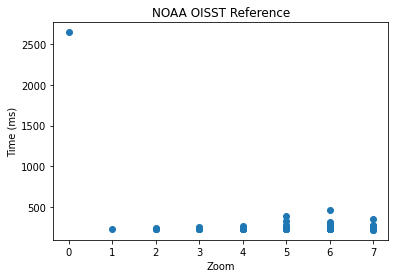

In [37]:
generate_zooms_plot(noaa_oisst_df, 'NOAA OISST Reference')